# Assignment 1 -- Insights from Overwatch League

## 76 total marks

In [121]:
# You will need the following packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Introduction

**Business Context.** You work for Overwatch League, the premier esports league for the game Overwatch. They have collected data about past pro tournaments and would like you to answer some questions about past tournaments. Build visualizations and answer the questions below. 

**About Overwatch League.** In the Overwatch League, teams of professional players compete against each other to be the best in the world at playing the team-based first-person shooter game, Overwatch.

Each match consists of two teams of six players each, with each player selecting one of the game's many heroes to play as. The teams are then tasked with completing various objectives, such as escorting a payload across the map or capturing and holding control points.

The team that is able to complete their objectives the quickest or prevent the other team from completing their objectives wins the match.

Matches are typically played in a best-of-three format, meaning that the first team to win two rounds is declared the winner. Each round is called a "map", and the team that wins the most maps wins the match.

The Overwatch League is divided into two seasons per year, with teams from all around the world competing in a variety of different venues. The top teams from each season advance to the playoffs, where they compete for the chance to be crowned the Overwatch League champion. Each map is one of two types, it is either a control map or an escort map.  

**Business Problem.** Your task is to format the given data and provide visualizations that would answer the specific questions the client has, which are mentioned below.

- **Analytical Context.** You are given a CSV file (stored in the already created ```data``` folder) containing details about each match like winning team, map type, date of match, tournament title, etc. 
You will be performing the following tasks on the data:

1. Read, transform, and prepare data for visualization
2. Perform analytics and construct visualizations of the data to identify patterns in the dataset
        
The client has a specific set of questions they would like to get answers to. You will need to provide visualizations to accompany these.

# Question 1 -- loading in and getting an overview (5 marks)

**1a) (1 mark)**  Use the pandas function ```read_csv()``` to load the file ```match_map_stats.csv``` as a DataFrame. Name this DataFrame ```df```. 

In [123]:
with open('data/match_map_stats.csv') as f:
    df=pd.read_csv(f, delimiter=',')


#df = pd.read_csv(r"C:\Users\ajayb\OneDrive\Documents\GitHub\math-1130\assignment_1_alt\assignment_1_alt\data\match_map_stats.csv")

**1b) (1 mark)** Print the first 5 rows of the DataFrame

In [15]:
df.head(5)

,round_start_time,round_end_time,stage,match_id,game_number,match_winner,map_winner,map_loser,map_name,map_round,...,team_one_name,team_two_name,attacker_payload_distance,defender_payload_distance,attacker_time_banked,defender_time_banked,attacker_control_perecent,defender_control_perecent,attacker_round_end_score,defender_round_end_score
0,01/11/18 00:12,01/11/18 00:20,2018: Stage 1,10223,1,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Dorado,1,...,Los Angeles Valiant,San Francisco Shock,75.61505,0.00000,0.000000,240.000,NaN,NaN,2,0
1,01/11/18 00:22,01/11/18 00:27,2018: Stage 1,10223,1,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Dorado,2,...,Los Angeles Valiant,San Francisco Shock,75.64960,75.61505,125.750570,0.000,NaN,NaN,3,2
2,01/11/18 00:34,01/11/18 00:38,2018: Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,1,...,Los Angeles Valiant,San Francisco Shock,0.00000,0.00000,250.492000,240.000,NaN,NaN,2,0
3,01/11/18 00:40,01/11/18 00:44,2018: Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,2,...,Los Angeles Valiant,San Francisco Shock,0.00000,0.00000,225.789030,250.492,NaN,NaN,2,2
4,01/11/18 00:46,01/11/18 00:49,2018: Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,3,...,Los Angeles Valiant,San Francisco Shock,0.00000,0.00000,36.396057,250.492,NaN,NaN,4,2


**1c) (1 mark)** Print the column names in `df`

In [168]:
df.columns

Index(['round_start_time', 'round_end_time', 'stage', 'match_id',
       'game_number', 'match_winner', 'map_winner', 'map_loser', 'map_name',
       'map_round', 'winning_team_final_map_score',
       'losing_team_final_map_score', 'control_round_name', 'Attacker',
       'Defender', 'team_one_name', 'team_two_name',
       'attacker_payload_distance', 'defender_payload_distance',
       'attacker_time_banked', 'defender_time_banked',
       'attacker_control_perecent', 'defender_control_perecent',
       'attacker_round_end_score', 'defender_round_end_score', 'map_type',
       'year'],
      dtype='object')

We have the following columns

- **round_start_time** Stating time of the round
- **round_end_time** Ending time of the round
- **stage** Stage of the competition
- **match_id** Id for the match
- **game_number** Game number in the given match
- **match_winner** Winner of the match
- **map_winner** Winner of the game/map
- **map_loser** Lost of the game/map
- **map_name** Name of map
- **map_round** Round number (each map has several rounds)
- **winning_team_final_map_score** Final score of map winner
- **losing_team_final_map_score** Final score of map loser
- **control_round_name** Name of the round if it was a control type map
- **attacker** Team that was the attacker
- **defender** Team that was the defender
- **team_one_name** Name of first team in match
- **team_two_name** Name of second team in match
- **attacker_payload_distance** Distance the attacker moved the payload on payload maps
- **defender_payload_distance** 
- **attacker_time_banked** Attacker time left over
- **defender_time_banked** Defender time left over
- **attacker_control_perecent** Percent objective was charged by the attacker team
- **defender_control_perecent** Percent objective was charged by the defender team
- **attacker_round_end_score** Attacker score at the end of this round
- **defender_round_end_score** Defender score at the end of this round

**1d) (2 marks)** Answer the folowing question:

Overwatch is aiming to expand their fanbase through the following advertising campaigns:

- ```[x]``` Advertising the most popular teams
- ```[x]``` Promoting a rematch between last years best teams
- ```[x]``` Creating an underdog story by highlighting last years worst performing teams
- [ ] Which demographics are more likely to buy tickets?

Which of these initiatives could directly benefit from an analysis of the data provided? Check all that apply.

**Note:** You can create check marks by double-clicking this cell and adding an ```[x]``` in the corresponding lines. 

# Question 2 -- Cleaning the data (5 marks) 

In this dataset there are two types of maps, escort and control. On control maps, the teams try to control an objective until the meter reaches 100. On escort maps, the attacker tries to escort a payload to the end of the map, while the defender tries to stop it. Control maps can be found in the dataset by rows where the `control_perecent` is not 0 for at least one team. That is, `control_perecent` will be Nan or 0 for both teams when the map is **not** a control map. 
- 2a) **(1 marks)** Create a variable for map type called map_type, which has two possible values "control" and "escort". 
- 2b) **(2 marks)** For rows which correspond to control maps, set the time_banked and payload distance values to `NaN`. 
- 2c) **(2 marks)** Ensure that `round_start_time` and `round_end_time` time variables are in the `date_time` format and create a variable called `year` which contains the year the match took place

In [141]:
# Correct the map_type classification
df['map_type'] = np.where((df['attacker_control_perecent'].notna() & (df['attacker_control_perecent'] != 0)) | 
                          (df['defender_control_perecent'].notna() & (df['defender_control_perecent'] != 0)), 
                          'control', 'escort')

# Print the updated map_type column
df.head(15)

,round_start_time,round_end_time,stage,match_id,game_number,match_winner,map_winner,map_loser,map_name,map_round,...,team_two_name,attacker_payload_distance,defender_payload_distance,attacker_time_banked,defender_time_banked,attacker_control_perecent,defender_control_perecent,attacker_round_end_score,defender_round_end_score,map_type
0,01/11/18 00:12,01/11/18 00:20,2018: Stage 1,10223,1,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Dorado,1,...,San Francisco Shock,75.615050,0.000000,0.000000,240.000000,NaN,NaN,2,0,escort
1,01/11/18 00:22,01/11/18 00:27,2018: Stage 1,10223,1,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Dorado,2,...,San Francisco Shock,75.649600,75.615050,125.750570,0.000000,NaN,NaN,3,2,escort
2,01/11/18 00:34,01/11/18 00:38,2018: Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,1,...,San Francisco Shock,0.000000,0.000000,250.492000,240.000000,NaN,NaN,2,0,escort
3,01/11/18 00:40,01/11/18 00:44,2018: Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,2,...,San Francisco Shock,0.000000,0.000000,225.789030,250.492000,NaN,NaN,2,2,escort
4,01/11/18 00:46,01/11/18 00:49,2018: Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,3,...,San Francisco Shock,0.000000,0.000000,36.396057,250.492000,NaN,NaN,4,2,escort
5,01/11/18 00:51,01/11/18 00:56,2018: Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,4,...,San Francisco Shock,0.000000,0.000000,0.000000,36.396057,NaN,NaN,3,4,escort
6,01/11/18 01:11,01/11/18 01:16,2018: Stage 1,10223,3,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Ilios,1,...,San Francisco Shock,0.000000,0.000000,0.000000,0.000000,99.0,100.0,0,1,control
7,01/11/18 01:17,01/11/18 01:20,2018: Stage 1,10223,3,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Ilios,2,...,San Francisco Shock,0.000000,0.000000,0.000000,0.000000,100.0,0.0,1,1,control
8,01/11/18 01:20,01/11/18 01:25,2018: Stage 1,10223,3,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Ilios,3,...,San Francisco Shock,0.000000,0.000000,0.000000,0.000000,100.0,65.0,2,1,control
9,01/11/18 01:32,01/11/18 01:39,2018: Stage 1,10223,4,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Numbani,1,...,San Francisco Shock,75.549510,0.000000,0.000000,0.000000,NaN,NaN,1,0,escort


In [153]:
### 2b 
df.loc[df['map_type'] == 'control', ['attacker_payload_distance' , 'defender_payload_distance', 'attacker_time_banked', 'defender_time_banked']] = np.nan

df.head(15)

,round_start_time,round_end_time,stage,match_id,game_number,match_winner,map_winner,map_loser,map_name,map_round,...,attacker_payload_distance,defender_payload_distance,attacker_time_banked,defender_time_banked,attacker_control_perecent,defender_control_perecent,attacker_round_end_score,defender_round_end_score,map_type,year
0,2018-01-11 00:12:00,2018-01-11 00:20:00,2018: Stage 1,10223,1,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Dorado,1,...,75.615050,0.000000,0.000000,240.000000,NaN,NaN,2,0,escort,2018
1,2018-01-11 00:22:00,2018-01-11 00:27:00,2018: Stage 1,10223,1,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Dorado,2,...,75.649600,75.615050,125.750570,0.000000,NaN,NaN,3,2,escort,2018
2,2018-01-11 00:34:00,2018-01-11 00:38:00,2018: Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,1,...,0.000000,0.000000,250.492000,240.000000,NaN,NaN,2,0,escort,2018
3,2018-01-11 00:40:00,2018-01-11 00:44:00,2018: Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,2,...,0.000000,0.000000,225.789030,250.492000,NaN,NaN,2,2,escort,2018
4,2018-01-11 00:46:00,2018-01-11 00:49:00,2018: Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,3,...,0.000000,0.000000,36.396057,250.492000,NaN,NaN,4,2,escort,2018
5,2018-01-11 00:51:00,2018-01-11 00:56:00,2018: Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,4,...,0.000000,0.000000,0.000000,36.396057,NaN,NaN,3,4,escort,2018
6,2018-01-11 01:11:00,2018-01-11 01:16:00,2018: Stage 1,10223,3,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Ilios,1,...,NaN,NaN,NaN,NaN,99.0,100.0,0,1,control,2018
7,2018-01-11 01:17:00,2018-01-11 01:20:00,2018: Stage 1,10223,3,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Ilios,2,...,NaN,NaN,NaN,NaN,100.0,0.0,1,1,control,2018
8,2018-01-11 01:20:00,2018-01-11 01:25:00,2018: Stage 1,10223,3,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Ilios,3,...,NaN,NaN,NaN,NaN,100.0,65.0,2,1,control,2018
9,2018-01-11 01:32:00,2018-01-11 01:39:00,2018: Stage 1,10223,4,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Numbani,1,...,75.549510,0.000000,0.000000,0.000000,NaN,NaN,1,0,escort,2018


In [155]:
### 2c
df['round_start_time'] = pd.to_datetime(df['round_start_time'])
df['round_end_time'] = pd.to_datetime(df['round_end_time'])
df['year'] = df['round_start_time'].dt.year

      round_start_time      round_end_time  year
0  2018-01-11 00:12:00 2018-01-11 00:20:00  2018
1  2018-01-11 00:22:00 2018-01-11 00:27:00  2018
2  2018-01-11 00:34:00 2018-01-11 00:38:00  2018
3  2018-01-11 00:40:00 2018-01-11 00:44:00  2018
4  2018-01-11 00:46:00 2018-01-11 00:49:00  2018
5  2018-01-11 00:51:00 2018-01-11 00:56:00  2018
6  2018-01-11 01:11:00 2018-01-11 01:16:00  2018
7  2018-01-11 01:17:00 2018-01-11 01:20:00  2018
8  2018-01-11 01:20:00 2018-01-11 01:25:00  2018
9  2018-01-11 01:32:00 2018-01-11 01:39:00  2018
10 2018-01-11 01:41:00 2018-01-11 01:45:00  2018
11 2018-01-11 02:08:00 2018-01-11 02:13:00  2018
12 2018-01-11 02:15:00 2018-01-11 02:15:00  2018
13 2018-01-11 02:25:00 2018-01-11 02:34:00  2018
14 2018-01-11 02:36:00 2018-01-11 02:38:00  2018
15 2018-01-11 02:52:00 2018-01-11 02:58:00  2018
16 2018-01-11 02:59:00 2018-01-11 03:03:00  2018
17 2018-01-11 03:11:00 2018-01-11 03:15:00  2018
18 2018-01-11 03:17:00 2018-01-11 03:19:00  2018
19 2018-01-11 03:46:

# Question 3 --  Win rates on control maps (14 marks) 

3a) **(2 marks)** Create and print a sorted list of the unique teams. Store this list in a variable called `teams`. 

In [147]:
##3a
team1 = set(df['team_one_name'])
team2 = set(df['team_two_name'])
unique_teams = team1.union(team2)
teams = sorted(unique_teams)
print(teams)

['Atlanta Reign', 'Boston Uprising', 'Chengdu Hunters', 'Dallas Fuel', 'Florida Mayhem', 'Guangzhou Charge', 'Hangzhou Spark', 'Houston Outlaws', 'London Spitfire', 'Los Angeles Gladiators', 'Los Angeles Valiant', 'New York Excelsior', 'Paris Eternal', 'Philadelphia Fusion', 'San Francisco Shock', 'Seoul Dynasty', 'Shanghai Dragons', 'Toronto Defiant', 'Vancouver Titans', 'Washington Justice']


3b) **(1 marks)** Create and print a dictionary called `country` with team names as keys and their corresponding country as the entries. 

In [180]:
##3b
country = {'Atlanta Reign' : 'USA', 'Boston Uprising':'USA', 'Chengdu Hunters': 'China', 'Dallas Fuel':'USA' , 'Florida Mayhem':'USA', 'Guangzhou Charge': 'China', 
          'Hangzhou Spark':'China', 'Houston Outlaws': 'USA', 'London Spitfire':'United Kingdom', 'Los Angeles Gladiators': 'USA', 'Los Angeles Valiant': 'USA', 'New York Excelsior':'USA', 
          'Paris Eternal':'France', 'Philadelphia Fusion':'USA', 'San Francisco Shock':'USA', 'Seoul Dynasty':'South Koera',
          'Shanghai Dragons': 'China', 'Toronto Defiant': 'Canada', 'Vancouver Titans': 'Canada', 'Washington Justice':'USA'}

print(country)

{'Atlanta Reign': 'USA', 'Boston Uprising': 'USA', 'Chengdu Hunters': 'China', 'Dallas Fuel': 'USA', 'Florida Mayhem': 'USA', 'Guangzhou Charge': 'China', 'Hangzhou Spark': 'China', 'Houston Outlaws': 'USA', 'London Spitfire': 'United Kingdom', 'Los Angeles Gladiators': 'USA', 'Los Angeles Valiant': 'USA', 'New York Excelsior': 'USA', 'Paris Eternal': 'France', 'Philadelphia Fusion': 'USA', 'San Francisco Shock': 'USA', 'Seoul Dynasty': 'South Koera', 'Shanghai Dragons': 'China', 'Toronto Defiant': 'Canada', 'Vancouver Titans': 'Canada', 'Washington Justice': 'USA'}


A team's win rate is the number of games won divided by the total number of games played
1. 3c) **(1 marks)** Subset the DataFrame so that it contains only the control maps.
2. 3d) **(5 marks)** Make a horizontal bar chart displaying the win rate on control maps of each team, order the bar chart from lowest win rate to highest win rate, add a vertical line at 50%. Color the teams by country. **Hint it is useful to use the `sns.barplot` function, set the `dodge` argument as follows:`dodge=False` and make use of the `orient`, `hue` and `hue_order` arguements.**
3. 3e) **(2 marks)** Which teams have a higher than 50% win rate? Do some countries produce better teams than others?


In [182]:
##3c
control_maps = df[df['map_type']=='control']

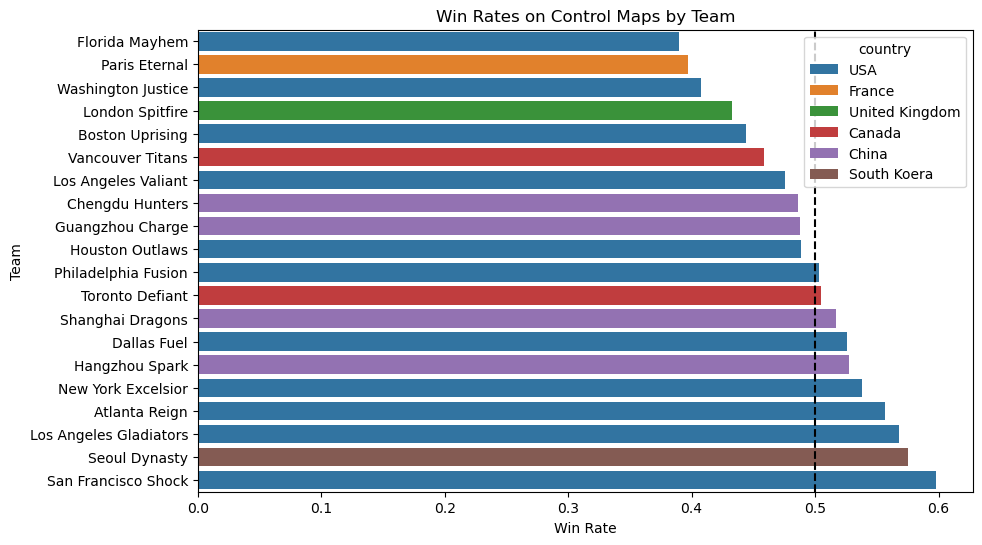

In [206]:
##3d
winner = control_maps["map_winner"].value_counts()
total_games1 = control_maps['team_one_name'].value_counts()
total_games2 = control_maps['team_two_name'].value_counts()
total_games = total_games1.add(total_games2, fill_value=0)

win_rate = winner / total_games

win_rate_df = win_rate.reset_index(name='win_rate').sort_values('win_rate')
win_rate_df.columns = ['team', 'win_rate']

win_rate_df['country'] = win_rate_df['team'].map(country)  # Ensure 'country' dictionary exists

plt.figure(figsize=(10, 6))  # Correct figure size
sns.barplot(data=win_rate_df, x='win_rate', y='team', hue='country', dodge=False, orient='h')

plt.axvline(0.5, color='black', linestyle='--')

plt.title("Win Rates on Control Maps by Team")
plt.xlabel('Win Rate')
plt.ylabel('Team')

plt.show()

In [214]:
##3e
teams_above_50 = win_rate_df[win_rate_df['win_rate'] > 0.5]
print("Teams with a win rate higher than 50%:")
print(teams_above_50)

print("Not really")


Teams with a win rate higher than 50%:
                      team  win_rate      country
13     Philadelphia Fusion  0.502783          USA
17         Toronto Defiant  0.504587       Canada
16        Shanghai Dragons  0.516569        China
3              Dallas Fuel  0.526205          USA
6           Hangzhou Spark  0.527697        China
11      New York Excelsior  0.537975          USA
0            Atlanta Reign  0.556701          USA
9   Los Angeles Gladiators  0.567951          USA
15           Seoul Dynasty  0.575342  South Koera
14     San Francisco Shock  0.597806          USA
Not really


3f) **(3 marks)** Make the same plot for each year - are the yearly plots similar to the overall plot? 

C:\Users\ajayb\AppData\Local\Temp\ipykernel_19724\3974561129.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_maps['round_start_time'] = pd.to_datetime(control_maps['round_start_time'])
C:\Users\ajayb\AppData\Local\Temp\ipykernel_19724\3974561129.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_maps['year'] = control_maps['round_start_time'].dt.year


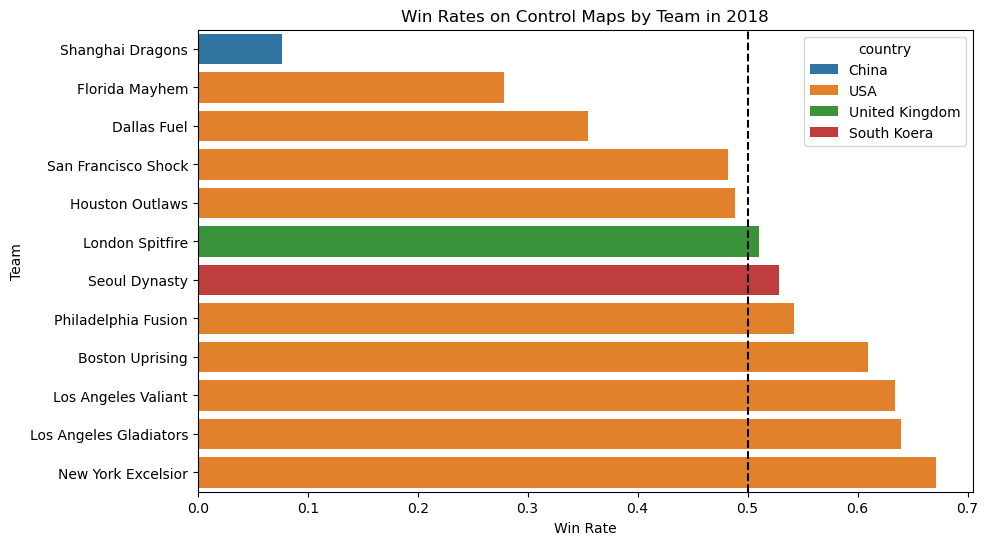

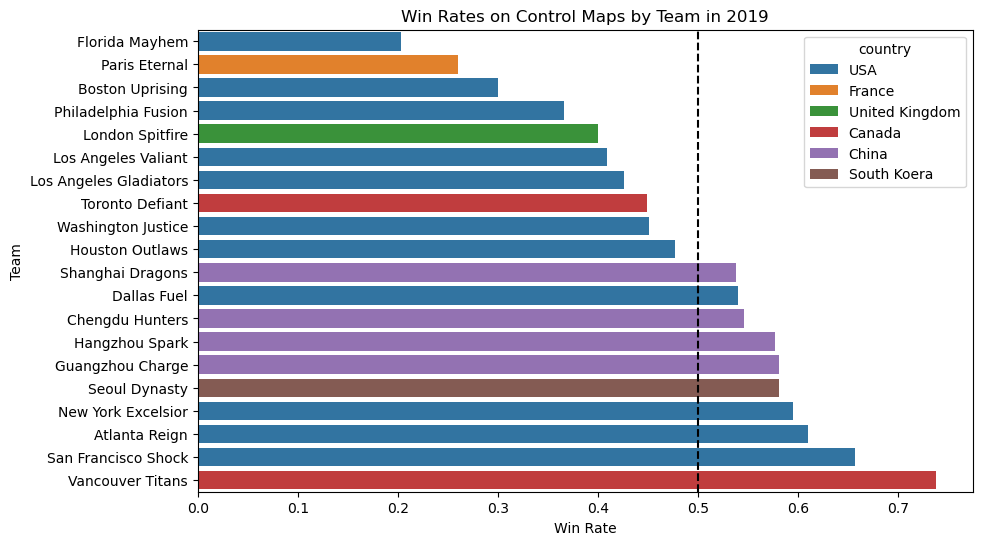

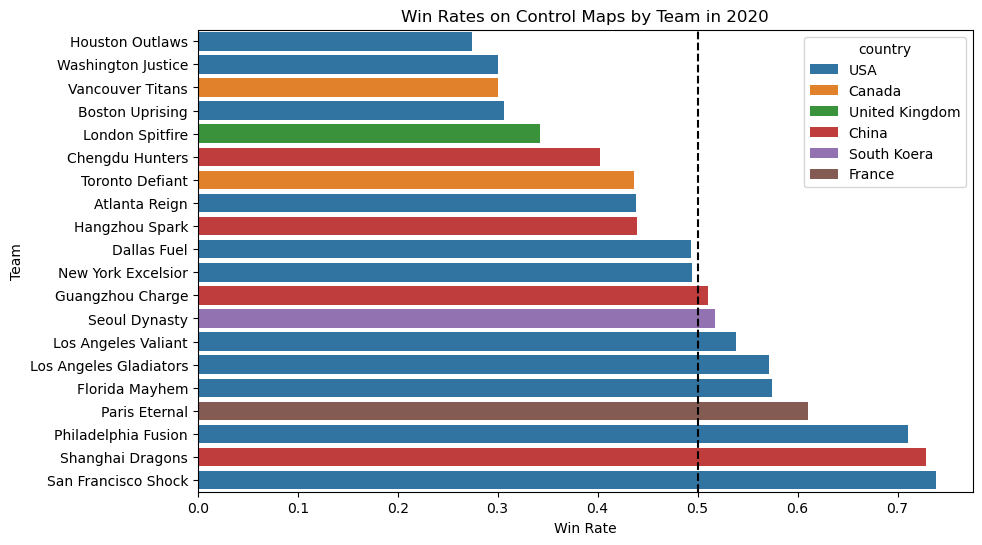

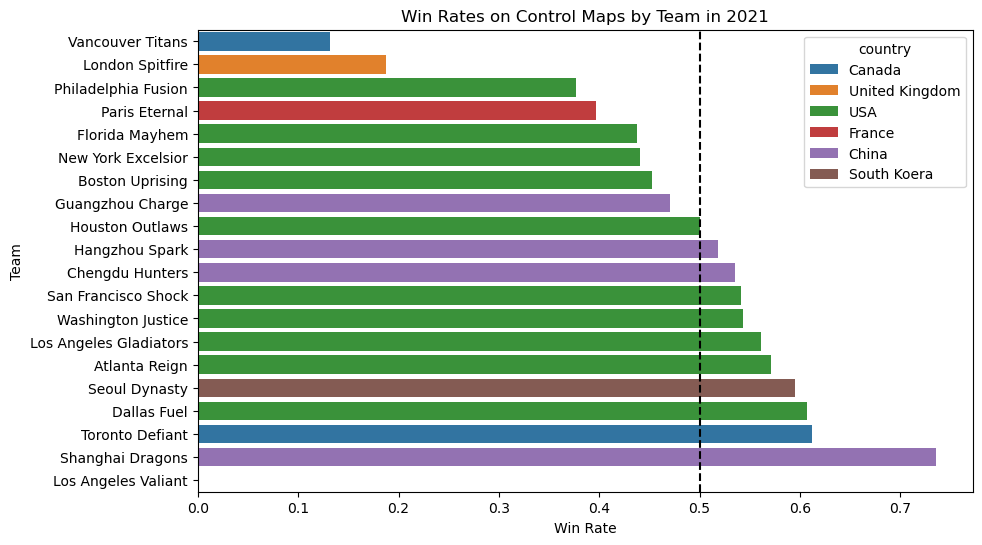

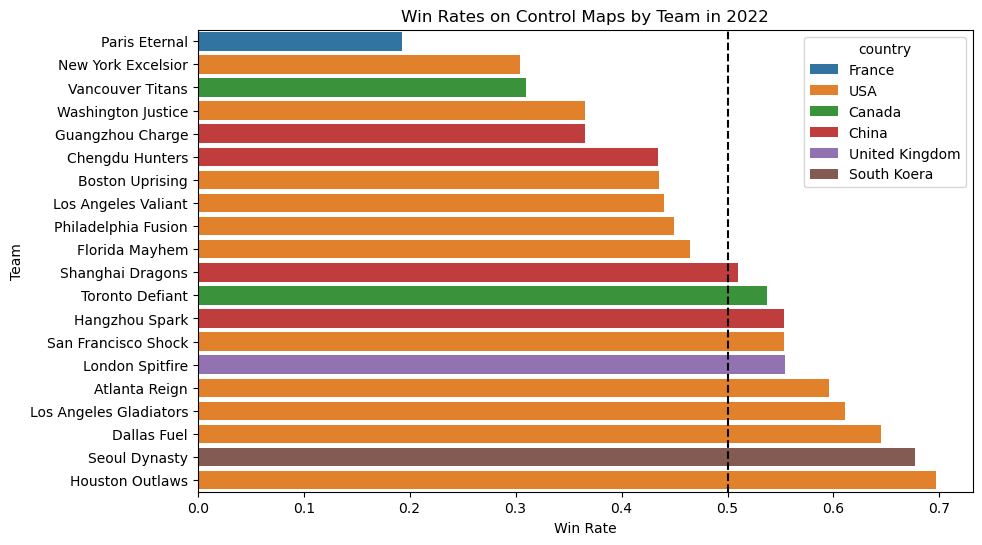

In [218]:
##3f

control_maps['round_start_time'] = pd.to_datetime(control_maps['round_start_time'])
control_maps['year'] = control_maps['round_start_time'].dt.year

for year in control_maps['year'].unique():
    yearly_data = control_maps[control_maps['year'] == year]
    
    winner = yearly_data["map_winner"].value_counts()
    total_games1 = yearly_data['team_one_name'].value_counts()
    total_games2 = yearly_data['team_two_name'].value_counts()
    total_games = total_games1.add(total_games2, fill_value=0)
    win_rate = winner / total_games
    
    win_rate_df = win_rate.reset_index(name='win_rate').sort_values('win_rate')
    win_rate_df.columns = ['team', 'win_rate']
    
    win_rate_df['country'] = win_rate_df['team'].map(country)  # Make sure 'country' mapping exists
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=win_rate_df, x='win_rate', y='team', hue='country', dodge=False, orient='h')
    
    plt.axvline(0.5, color='black', linestyle='--')
    
    # Customize the plot with title for each year
    plt.title(f"Win Rates on Control Maps by Team in {year}")
    plt.xlabel("Win Rate")
    plt.ylabel("Team")
    
    plt.show()

# Question 4 -- Win rates over time (17 marks)

- 4a) **(3 marks)** Make a line of the Shanghai Dragons' win rate on control maps over time. 
- 4b) **(1 marks)** How would describe the Shanghai Dragons' win rate on control maps over time?
- 4c) **(3 marks)** For each team who had a win rate on control maps in the top 5 in 2022, plot their win rates on control maps over time. 
- 4d) **(2 marks)** Make two observations about these plots. 

- 4e) **(5 marks)** Instead of control maps, make a bar chart of the teams' win rates on the escort maps in 2022, i.e., consider only escort maps which occured in 2022 when computing this win rate. Make the same chart without subsetting to 2022, i.e., compute the escort map win rate for each team using maps which took place in any year. For example, the win rate chart on escort maps for 2022 should look like the following: <img src="WRE.png" alt="drawing" width="500"/> Note that the vertical line at 50 is useful but not necessary. 
- 4f) **(3 marks)** Compare the 2022 win rates on control maps to those on the escort maps. What do you observe?


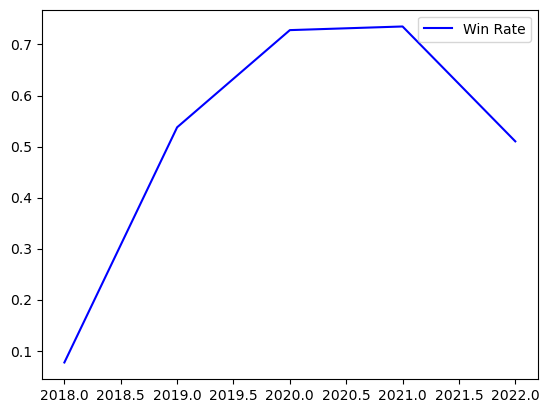

In [245]:
##4a
import matplotlib.pyplot as plt
import pandas as pd

dragons_data = control_maps[(control_maps['team_one_name'] == 'Shanghai Dragons') | 
                            (control_maps['team_two_name'] == 'Shanghai Dragons')].copy()
dragons_data.loc[:, 'win'] = dragons_data['map_winner'] == 'Shanghai Dragons'

games_per_year = dragons_data.groupby('year').size()  # Total games played by year
wins_per_year = dragons_data.groupby('year')['win'].sum()  # Total wins by year

win_rate_per_year = wins_per_year / games_per_year

plt.plot(win_rate_per_year.index, win_rate_per_year.values, linestyle='-', color='b', label='Win Rate')
plt.legend()
plt.show()

In [255]:
##4b
print("They initially started off with a really bad win rate. However over the years they have improved and in 2021 they reached peak but in 2022 we start to see a decline again in win rate")

They initially started off with a really bad win rate. However over the years they have improved and in 2021 they reached peak but in 2022 we start to see a decline again in win rate


C:\Users\ajayb\AppData\Local\Temp\ipykernel_19724\1005495720.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_data['win'] = team_data['map_winner'] == team
C:\Users\ajayb\AppData\Local\Temp\ipykernel_19724\1005495720.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_data['win'] = team_data['map_winner'] == team
C:\Users\ajayb\AppData\Local\Temp\ipykernel_19724\1005495720.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

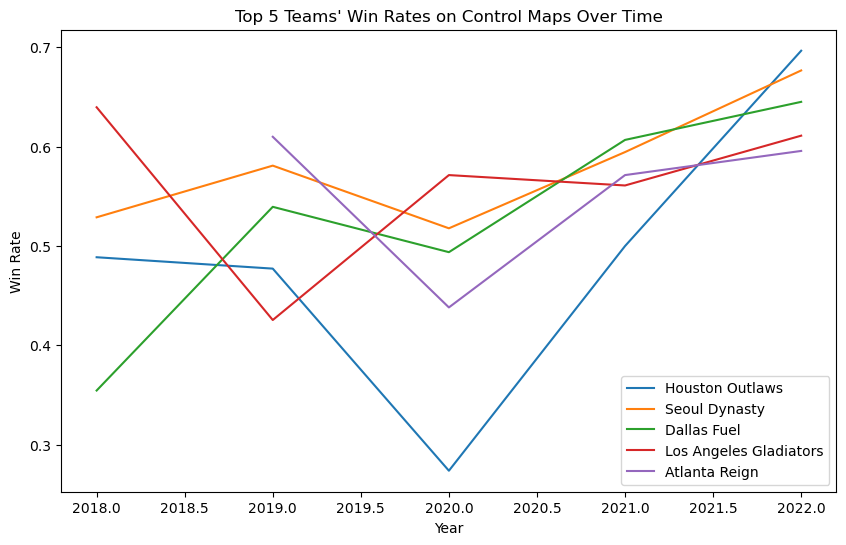

In [264]:
##4c
import matplotlib.pyplot as plt
import pandas as pd

control_maps_2022 = control_maps[control_maps['year'] == 2022]

winner_2022 = control_maps_2022["map_winner"].value_counts()
total_games1_2022 = control_maps_2022['team_one_name'].value_counts()
total_games2_2022 = control_maps_2022['team_two_name'].value_counts()
total_games_2022 = total_games1_2022.add(total_games2_2022, fill_value=0)
win_rate_2022 = winner_2022 / total_games_2022

top_5_teams_2022 = win_rate_2022.nlargest(5).index

# Step 4: Plot win rates over time for each of the top 5 teams
plt.figure(figsize=(10, 6))

for team in top_5_teams_2022:
    team_data = control_maps[(control_maps['team_one_name'] == team) | 
                             (control_maps['team_two_name'] == team)]
    
    team_data['win'] = team_data['map_winner'] == team
    
    games_per_year = team_data.groupby('year').size()  # Total games played by year
    wins_per_year = team_data.groupby('year')['win'].sum()  # Total wins by year
    win_rate_per_year = wins_per_year / games_per_year
    
    plt.plot(win_rate_per_year.index, win_rate_per_year.values, linestyle='-', label=team)

# Step 5: Customize the plot
plt.title("Top 5 Teams' Win Rates on Control Maps Over Time")
plt.xlabel("Year")
plt.ylabel("Win Rate")
plt.legend()

# Show the plot
plt.show()

In [ ]:
##4d
print("4 out of the 5 teams are based in the USA")

In [271]:
##4e
# Step 1: Subset the data for escort maps (both years and 2022 only)
# Debugging: Ensure escort maps are correctly identified
escort_maps = control_maps[(control_maps['attacker_control_perecent'] == 0) & (control_maps['defender_control_perecent'] == 0)]
print(f"Total escort maps: {escort_maps.shape[0]}")  # Debugging line

escort_maps_2022 = escort_maps[escort_maps['year'] == 2022]
print(f"Escort maps in 2022: {escort_maps_2022.shape[0]}")  # Debugging line

# Step 2: Calculate win rates for each team (2022 only)
if escort_maps_2022.shape[0] > 0:  # Ensure there are escort maps in 2022
    winner_2022 = escort_maps_2022["map_winner"].value_counts()
    total_games1_2022 = escort_maps_2022['team_one_name'].value_counts()
    total_games2_2022 = escort_maps_2022['team_two_name'].value_counts()
    total_games_2022 = total_games1_2022.add(total_games2_2022, fill_value=0)
    win_rate_2022 = winner_2022 / total_games_2022

    # Step 3: Plot the bar chart for 2022
    win_rate_2022 = win_rate_2022.dropna().sort_values(ascending=False)  # Drop NaN and sort
    plt.figure(figsize=(10, 6))
    sns.barplot(x=win_rate_2022.values, y=win_rate_2022.index, palette="Blues_d")
    plt.title("Win Rates on Escort Maps (2022)")
    plt.xlabel("Win Rate")
    plt.ylabel("Teams")
    plt.axvline(0.5, color='red', linestyle='--')  # Reference line at 50%
    plt.show()
else:
    print("No escort maps for 2022")

# Step 4: Calculate win rates for all years (without subsetting to 2022)
if escort_maps.shape[0] > 0:  # Ensure there are escort maps in all years
    winner_all_years = escort_maps["map_winner"].value_counts()
    total_games1_all_years = escort_maps['team_one_name'].value_counts()
    total_games2_all_years = escort_maps['team_two_name'].value_counts()
    total_games_all_years = total_games1_all_years.add(total_games2_all_years, fill_value=0)
    win_rate_all_years = winner_all_years / total_games_all_years

    # Step 5: Plot the bar chart for all years
    win_rate_all_years = win_rate_all_years.dropna().sort_values(ascending=False)  # Drop NaN and sort
    plt.figure(figsize=(10, 6))
    sns.barplot(x=win_rate_all_years.values, y=win_rate_all_years.index, palette="Greens_d")
    plt.title("Win Rates on Escort Maps (All Years)")
    plt.xlabel("Win Rate")
    plt.ylabel("Teams")
    plt.axvline(0.5, color='red', linestyle='--')  # Reference line at 50%
    plt.show()
else:
    print("No escort maps for all years")


Total escort maps: 0
Escort maps in 2022: 0
No escort maps for 2022
No escort maps for all years


In [ ]:
##4f


# Question 5 --  What map should Toronto work on improving? (18 marks)

Suppose you have been contracted as an analyst for the Toronto Defiant team. 

- 5a) **(5 marks)**  There are different types of control maps, which can be found in the `control_round_name` column. Make a bar chart of Toronto's win rate on each individual control map (can be found in `control_round_name`) for 2022 and all time. For example, your plot might look like: 
<img src="WRTD.png" alt="drawing" width="500"/>
- 5b) **(5 marks)** Which plot should be used to make reccommendations for Toronto in 2023? Based on this judgement and the plot you generated, what map should Toronto practice the most? Are there any problems with this analysis?
- 5c) **(2 marks)**  Assign each team a rank according to their 2022 control map win rate, with 1 being the highest win rate on control maps in 2022 and 20 being the lowest win rate on control maps in 2022. Print each team name with its rank beside it. 
- 5d) **(3 marks)** Determine Toronto's three best and three worst control map names (by win rate) in 2022. Print the mean rank of the teams Toronto played for each of these maps. 
- 5e) **(3 marks)** Compare the mean ranks on Toronto's best maps to their worst maps. What does this analysis reveal about Toronto's map-specific win rates?

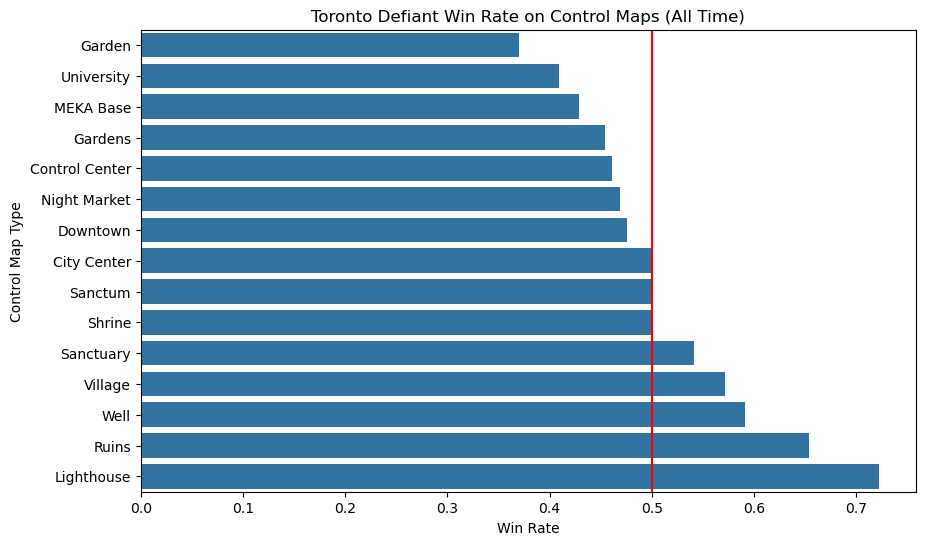

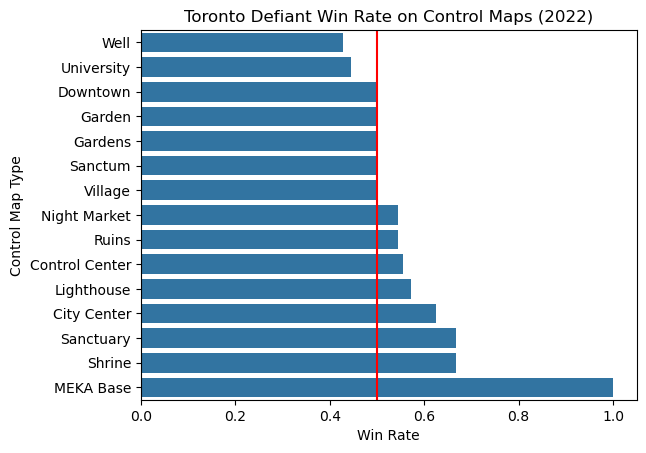

In [283]:
##5a
Toronto_Wins = control_maps[control_maps['map_winner'] == 'Toronto Defiant']
Toronto_Loss = control_maps[control_maps['map_loser'] == 'Toronto Defiant']
Toronto = pd.concat([Toronto_Wins, Toronto_Loss])

wins = Toronto_Wins.groupby('control_round_name')['round_start_time'].count()
losses = Toronto_Loss.groupby('control_round_name')['round_start_time'].count()

wins.rename('num_wins', inplace=True)
losses.rename('num_losses', inplace=True)

t_by_map = pd.concat([wins, losses], axis=1).fillna(0)  # Fill NaN with 0 (no games played)
t_by_map['win_rate'] = t_by_map['num_wins'] / (t_by_map['num_wins'] + t_by_map['num_losses'])
t_by_map['map_name'] = t_by_map.index
t_by_map = t_by_map.sort_values('win_rate')

plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=t_by_map, y='map_name', x='win_rate', orient='h', dodge=False)
barplot.axvline(0.5, color='red')  # Add 50% reference line
plt.title("Toronto Defiant Win Rate on Control Maps (All Time)")
plt.xlabel("Win Rate")
plt.ylabel("Control Map Type")
plt.show()

Toronto_Wins_2022 = Toronto_Wins[Toronto_Wins['year'] == 2022]
Toronto_Loss_2022 = Toronto_Loss[Toronto_Loss['year'] == 2022]

wins_2022 = Toronto_Wins_2022.groupby('control_round_name')['round_start_time'].count()
losses_2022 = Toronto_Loss_2022.groupby('control_round_name')['round_start_time'].count()

wins_2022.rename('num_wins', inplace=True)
losses_2022.rename('num_losses', inplace=True)

t_by_map_2022 = pd.concat([wins_2022, losses_2022], axis=1).fillna(0)  # Fill NaN with 0
t_by_map_2022['win_rate'] = t_by_map_2022['num_wins'] / (t_by_map_2022['num_wins'] + t_by_map_2022['num_losses'])
t_by_map_2022['map_name'] = t_by_map_2022.index
t_by_map_2022 = t_by_map_2022.sort_values('win_rate')

barplot = sns.barplot(data=t_by_map_2022, y='map_name', x='win_rate', orient='h', dodge=False)
barplot.axvline(0.5, color='red')  
plt.title("Toronto Defiant Win Rate on Control Maps (2022)")
plt.xlabel("Win Rate")
plt.ylabel("Control Map Type")
plt.show()

In [ ]:
##5b


In [294]:
#5c
control_maps_2022 = control_maps[control_maps['year'] == 2022]


wins_2022 = control_maps_2022['map_winner'].value_counts()
total_games_1_2022 = control_maps_2022['team_one_name'].value_counts()
total_games_2_2022 = control_maps_2022['team_two_name'].value_counts()

total_games_2022 = total_games_1_2022.add(total_games_2_2022, fill_value=0)

win_rate_2022 = wins_2022 / total_games_2022

win_rate_2022_ranked = win_rate_2022.rank(ascending=False, method='min')  # Rank with 1 being the highest

sorted_teams_2022 = win_rate_2022_ranked.sort_values()
print("Team Ranking by Control Map Win Rate in 2022:")
for team, rank in sorted_teams_2022.items():
    print(f"Team: {team}, Rank: {float(rank)}")

Team Ranking by Control Map Win Rate in 2022:
Team: Houston Outlaws, Rank: 1.0
Team: Seoul Dynasty, Rank: 2.0
Team: Dallas Fuel, Rank: 3.0
Team: Los Angeles Gladiators, Rank: 4.0
Team: Atlanta Reign, Rank: 5.0
Team: London Spitfire, Rank: 6.0
Team: San Francisco Shock, Rank: 7.0
Team: Hangzhou Spark, Rank: 8.0
Team: Toronto Defiant, Rank: 9.0
Team: Shanghai Dragons, Rank: 10.0
Team: Florida Mayhem, Rank: 11.0
Team: Philadelphia Fusion, Rank: 12.0
Team: Los Angeles Valiant, Rank: 13.0
Team: Boston Uprising, Rank: 14.0
Team: Chengdu Hunters, Rank: 15.0
Team: Guangzhou Charge, Rank: 16.0
Team: Washington Justice, Rank: 16.0
Team: Vancouver Titans, Rank: 18.0
Team: New York Excelsior, Rank: 19.0
Team: Paris Eternal, Rank: 20.0


In [296]:
##5d
import pandas as pd

# Step 1: Subset the data for control maps in 2022 where Toronto Defiant played
toronto_control_maps_2022 = control_maps[(control_maps['year'] == 2022) & 
                                         ((control_maps['team_one_name'] == 'Toronto Defiant') | 
                                          (control_maps['team_two_name'] == 'Toronto Defiant'))]

# Step 2: Calculate wins and losses for Toronto by control map type
toronto_wins_2022 = toronto_control_maps_2022[toronto_control_maps_2022['map_winner'] == 'Toronto Defiant']
toronto_losses_2022 = toronto_control_maps_2022[toronto_control_maps_2022['map_loser'] == 'Toronto Defiant']

# Count wins and losses for each control map
wins_by_map_2022 = toronto_wins_2022.groupby('control_round_name').size()
losses_by_map_2022 = toronto_losses_2022.groupby('control_round_name').size()

# Combine wins and losses and calculate win rate by map
games_by_map_2022 = wins_by_map_2022.add(losses_by_map_2022, fill_value=0)
win_rate_by_map_2022 = wins_by_map_2022 / games_by_map_2022

# Step 3: Identify the three best and three worst maps by win rate
best_maps = win_rate_by_map_2022.nlargest(3)
worst_maps = win_rate_by_map_2022.nsmallest(3)

# Step 4: Calculate mean rank of the teams Toronto played on each map
# Using the team rankings calculated in the previous question (win_rate_2022_ranked)
def calculate_mean_rank(map_data, rankings):
    mean_ranks = {}
    for map_name in map_data.index:
        # Get the teams Toronto played against on this map
        teams_played = toronto_control_maps_2022[toronto_control_maps_2022['control_round_name'] == map_name]
        opponent_teams = pd.concat([teams_played['team_one_name'], teams_played['team_two_name']])
        opponent_teams = opponent_teams[opponent_teams != 'Toronto Defiant']  # Exclude Toronto itself

        # Get the rank for each opponent and calculate the mean rank
        mean_rank = rankings.loc[opponent_teams].mean()
        mean_ranks[map_name] = mean_rank
    return mean_ranks

# Calculate mean rank for best and worst maps
best_maps_mean_rank = calculate_mean_rank(best_maps, win_rate_2022_ranked)
worst_maps_mean_rank = calculate_mean_rank(worst_maps, win_rate_2022_ranked)

# Step 5: Print the results
print("Toronto's Three Best Maps (2022) with Mean Opponent Rank:")
for map_name, rank in best_maps_mean_rank.items():
    print(f"Map: {map_name}, Mean Opponent Rank: {rank:.2f}")

print("\nToronto's Three Worst Maps (2022) with Mean Opponent Rank:")
for map_name, rank in worst_maps_mean_rank.items():
    print(f"Map: {map_name}, Mean Opponent Rank: {rank:.2f}")

Toronto's Three Best Maps (2022) with Mean Opponent Rank:
Map: MEKA Base, Mean Opponent Rank: 1.00
Map: Sanctuary, Mean Opponent Rank: 3.67
Map: Shrine, Mean Opponent Rank: 14.67

Toronto's Three Worst Maps (2022) with Mean Opponent Rank:
Map: Well, Mean Opponent Rank: 10.71
Map: University, Mean Opponent Rank: 10.00
Map: Downtown, Mean Opponent Rank: 5.00


In [ ]:
##5e
print("")

# Question 6 -- (9 marks) 

The league is considering changing the rules if too many matches (>5\%) end in a draw. The league organizers consider draws to be bad for the game. 


- 6a) **(3 marks)** What proportion of escort maps end in a draw?
- 6b) **(6 marks)** Make a bar plot of number of draws by map. Do certain escort maps have more draws? What proportion of draws happen on the maps with the two highest number of draws -- what would you tell the league organisers concerning this proportion?

Draw Percent: 3.84%


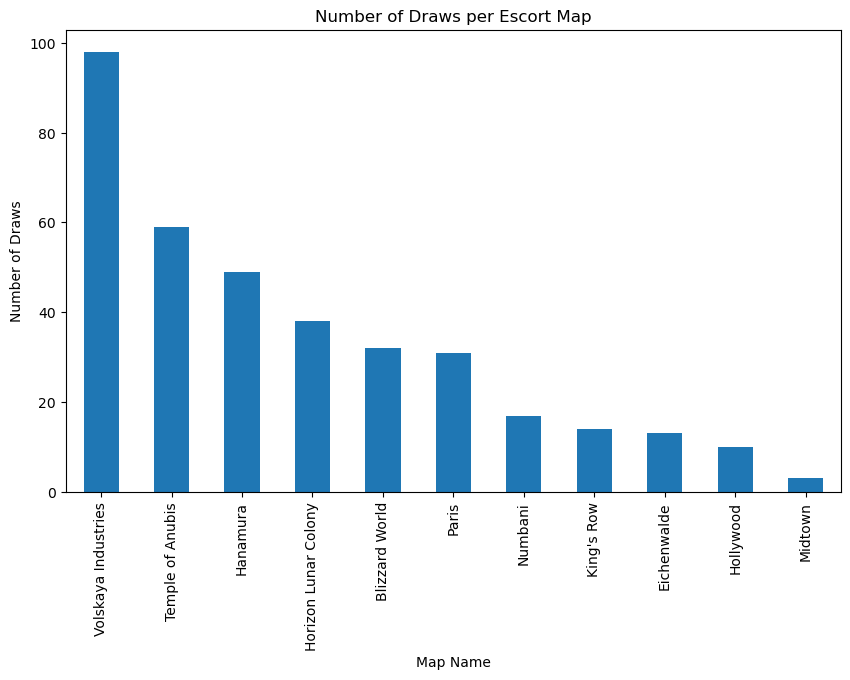

Percent of Draws on Top 2 Maps: 43.13%


In [304]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Subset the data for escort maps
escort_maps = df[df['map_type'] == 'escort']  # Assuming 'map_type' identifies escort maps

# Step 2: Identify escort maps that ended in a draw
# Assuming 'map_winner' contains 'draw' for maps that ended in a draw
escort_draws = escort_maps[escort_maps['map_winner'] == 'draw']

# Step 3: Calculate the percentage of escort maps that ended in a draw
draw_percent = (escort_draws.shape[0] / escort_maps.shape[0]) * 100
print(f"Draw Percent: {round(draw_percent, 2)}%")

# Step 4: Group by map name and count the number of draws for each map
draws_by_map = escort_draws.groupby('map_name').size().sort_values(ascending=False)

# Step 5: Plot the number of draws per map
draws_by_map.plot(kind='bar', figsize=(10, 6))
plt.title("Number of Draws per Escort Map")
plt.xlabel("Map Name")
plt.ylabel("Number of Draws")
plt.show()

# Step 6: Calculate the percentage of draws that occurred on the top two maps
top_two_maps_draws = draws_by_map[0:2].sum()  # Sum of draws for the top two maps
total_draws = draws_by_map.sum()  # Total number of draws
top_two_maps_percent = (top_two_maps_draws / total_draws) * 100
print(f"Percent of Draws on Top 2 Maps: {round(top_two_maps_percent, 2)}%")

# Question 7 -- (8 marks) 

On escort maps, the attacker must push a "payload" a certain distance within an alotted time. If the attacker pushes the payload to the end of the map before the alotted time is up, then the attacker can bank that time. On the other hand, if the attacker does not push the payload to the end of the map, the distance they were able to push it is recorded. 

- 7a) **(4 marks)** On maps where the attacker won the round, print the summary statistics of the `attacker_time_banked` column, along with a histogram of the `attacker_time_banked` column. On maps where the attacker lost the round, print the summary statistics of the `attacker_payload_distance` column, along with a histogram of the `attacker_payload_distance` column. 
- 7b) **(4 marks)** Describe the characteristics of the histrograms and interpret the summary statistics in the context of the data. 

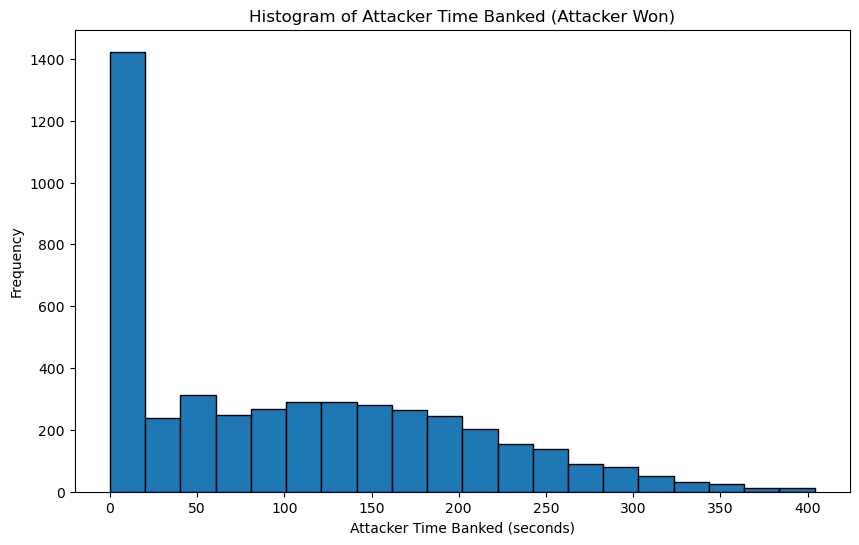

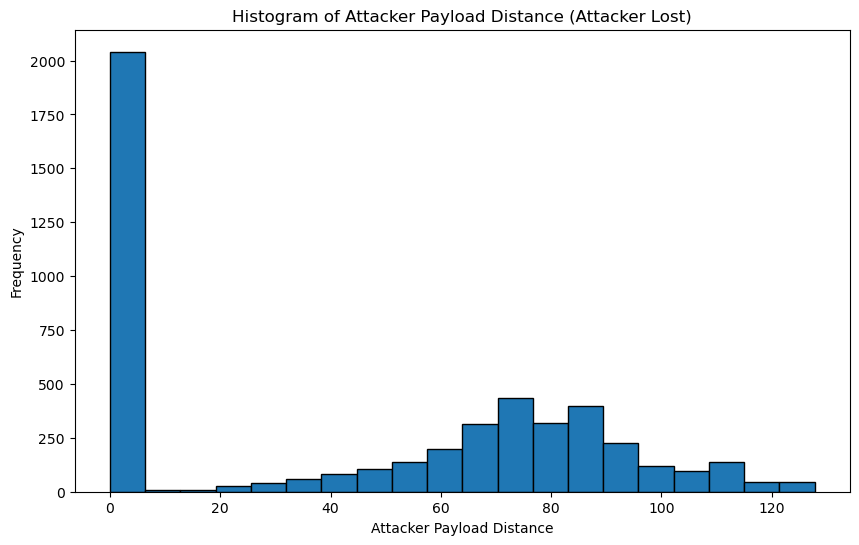

Summary Statistics for Attacker Time Banked (Attacker Won):
count    4650.000000
mean      102.680841
std        94.727551
min         0.000000
25%         0.000000
50%        89.320032
75%       172.368532
max       404.037000
Name: attacker_time_banked, dtype: float64

Summary Statistics for Attacker Payload Distance (Attacker Lost):
count    4837.000000
mean       44.180321
std        41.113007
min         0.000000
25%         0.000000
50%        53.503113
75%        79.922066
max       127.754380
Name: attacker_payload_distance, dtype: float64


In [311]:
##7a
# Step 1: Ensure 'escort' DataFrame is properly defined from the main dataset (assuming 'df' is the main dataset)
escort = df[df['map_type'] == 'escort']  # Filter for escort maps

# Step 2: Filter for rounds where the attacker won
mask = escort['Attacker'] == escort['map_winner']
escort_aw = escort[mask]  # Attacker won the round

# Step 3: Plot the histogram for attacker_time_banked when the attacker won
plt.figure(figsize=(10, 6))
escort_aw['attacker_time_banked'].dropna().plot(kind='hist', bins=20, edgecolor='black')
plt.title("Histogram of Attacker Time Banked (Attacker Won)")
plt.xlabel("Attacker Time Banked (seconds)")
plt.ylabel("Frequency")
plt.show()

# Step 4: Filter for rounds where the attacker lost
mask2 = escort['Attacker'] != escort['map_winner']
escort_al = escort[mask2]  # Attacker lost the round

# Step 5: Plot the histogram for attacker_payload_distance when the attacker lost
plt.figure(figsize=(10, 6))
escort_al['attacker_payload_distance'].dropna().plot(kind='hist', bins=20, edgecolor='black')
plt.title("Histogram of Attacker Payload Distance (Attacker Lost)")
plt.xlabel("Attacker Payload Distance")
plt.ylabel("Frequency")
plt.show()

# Step 6: Print summary statistics for both cases
print("Summary Statistics for Attacker Time Banked (Attacker Won):")
print(escort_aw['attacker_time_banked'].describe())

print("\nSummary Statistics for Attacker Payload Distance (Attacker Lost):")
print(escort_al['attacker_payload_distance'].describe())